# Обробка данних, зміна типу данних, перейменування данних під модель

In [2]:
import numpy as np 
import pandas as pd  

df = pd.read_csv('../data/sales_data.csv')

In [3]:
df.head()

,item_id,item_name,category,date,sales_qty,month,is_holiday
0,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-01,11,1,True
1,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-02,25,1,False
2,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-03,37,1,False
3,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-04,60,1,False
4,1,Piątnica Mleko 3.2%,Молочні продукти,2023-01-05,82,1,False


In [4]:
df.describe()

,item_id,sales_qty,month
count,475150.000000,475150.000000,475150.000000
mean,325.500000,21.603424,6.519836
std,187.638813,12.040455,3.449555
min,1.000000,0.000000,1.000000
25%,163.000000,13.000000,4.000000
50%,325.500000,19.000000,7.000000
75%,488.000000,28.000000,10.000000
max,650.000000,141.000000,12.000000


In [5]:
df.drop(columns=['item_id', 'category', 'month', 'is_holiday'], inplace=True)

In [6]:
df.describe()

,sales_qty
count,475150.000000
mean,21.603424
std,12.040455
min,0.000000
25%,13.000000
50%,19.000000
75%,28.000000
max,141.000000


In [7]:
df.head()

,item_name,date,sales_qty
0,Piątnica Mleko 3.2%,2023-01-01,11
1,Piątnica Mleko 3.2%,2023-01-02,25
2,Piątnica Mleko 3.2%,2023-01-03,37
3,Piątnica Mleko 3.2%,2023-01-04,60
4,Piątnica Mleko 3.2%,2023-01-05,82


In [8]:
df.dtypes

item_name    object
date         object
sales_qty     int64
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['item_name'] = df['item_name'].astype('category')


In [10]:
df.head()

,item_name,date,sales_qty
0,Piątnica Mleko 3.2%,2023-01-01,11
1,Piątnica Mleko 3.2%,2023-01-02,25
2,Piątnica Mleko 3.2%,2023-01-03,37
3,Piątnica Mleko 3.2%,2023-01-04,60
4,Piątnica Mleko 3.2%,2023-01-05,82


In [11]:
df = df.rename(columns={'date': 'ds', 'sales_qty': 'y'})

In [12]:
df.head()

,item_name,ds,y
0,Piątnica Mleko 3.2%,2023-01-01,11
1,Piątnica Mleko 3.2%,2023-01-02,25
2,Piątnica Mleko 3.2%,2023-01-03,37
3,Piątnica Mleko 3.2%,2023-01-04,60
4,Piątnica Mleko 3.2%,2023-01-05,82


In [13]:
from prophet import Prophet
import pandas as pd
import pickle
import os

# 📁 Створення директорії для моделей
model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

# 🔁 Цикл по унікальних товарах
forecast_list = []
forecast_horizon = 30  # кількість днів для прогнозу

for item in df['item_name'].unique():
    item_df = df[df['item_name'] == item][['ds', 'y']].copy()

    try:
        # 🧠 Тренування моделі
        model = Prophet()
        model.fit(item_df)

        # 📈 Прогноз
        future = model.make_future_dataframe(periods=forecast_horizon)
        forecast = model.predict(future)

        # 📊 Підготовка результатів
        forecast_result = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
        forecast_result['item_name'] = item
        forecast_list.append(forecast_result)

        # 💾 Збереження моделі
        with open(f'{model_dir}/prophet_{item}.pkl', 'wb') as f:
            pickle.dump(model, f)

    except Exception as e:
        print(f"⚠️ Помилка при обробці '{item}': {e}")

# 📚 Об’єднання всіх прогнозів
final_forecast_df = pd.concat(forecast_list, ignore_index=True)

# ✅ Готовий результат
print(final_forecast_df.head())


18:01:07 - cmdstanpy - INFO - Chain [1] start processing
18:01:07 - cmdstanpy - INFO - Chain [1] done processing
18:01:07 - cmdstanpy - INFO - Chain [1] start processing
18:01:07 - cmdstanpy - INFO - Chain [1] done processing
18:01:07 - cmdstanpy - INFO - Chain [1] start processing
18:01:07 - cmdstanpy - INFO - Chain [1] done processing
18:01:07 - cmdstanpy - INFO - Chain [1] start processing
18:01:07 - cmdstanpy - INFO - Chain [1] done processing
18:01:07 - cmdstanpy - INFO - Chain [1] start processing
18:01:07 - cmdstanpy - INFO - Chain [1] done processing
18:01:07 - cmdstanpy - INFO - Chain [1] start processing
18:01:07 - cmdstanpy - INFO - Chain [1] done processing
18:01:07 - cmdstanpy - INFO - Chain [1] start processing
18:01:07 - cmdstanpy - INFO - Chain [1] done processing
18:01:07 - cmdstanpy - INFO - Chain [1] start processing
18:01:07 - cmdstanpy - INFO - Chain [1] done processing
18:01:08 - cmdstanpy - INFO - Chain [1] start processing
18:01:08 - cmdstanpy - INFO - Chain [1]

          ds       yhat  yhat_lower  yhat_upper            item_name
0 2023-01-01  32.540017   17.620161   45.534568  Piątnica Mleko 3.2%
1 2023-01-02  35.012600   19.964360   48.679833  Piątnica Mleko 3.2%
2 2023-01-03  39.967029   25.680816   54.831192  Piątnica Mleko 3.2%
3 2023-01-04  37.870754   23.414773   51.570426  Piątnica Mleko 3.2%
4 2023-01-05  35.593315   20.866708   50.049312  Piątnica Mleko 3.2%


In [16]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# final_forecast_df — твій датафрейм з прогнозом
final_forecast_df['ds'] = pd.to_datetime(final_forecast_df['ds'])

# Припустимо, що у тебе є дата останнього реального продажу
last_real_date = final_forecast_df['ds'].max() - pd.Timedelta(days=30)  # припустимо останні 30 днів - історія, решта - прогноз

# Створюємо селектор товарів
item_dropdown = widgets.Dropdown(
    options=final_forecast_df['item_name'].unique(),
    description='Оберіть товар:',
    disabled=False,
)

output = widgets.Output()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output:
            clear_output()
            selected_item = change['new']
            # Фільтруємо прогноз для вибраного товару і майбутніх 30 днів (після last_real_date)
            df_item = final_forecast_df[
                (final_forecast_df['item_name'] == selected_item) & 
                (final_forecast_df['ds'] > last_real_date)
            ][['ds', 'yhat']]
            df_item['yhat'] = df_item['yhat'].round().astype(int)
            df_item['ds'] = df_item['ds'].dt.strftime('%Y-%m-%d')
            
            if df_item.empty:
                print("Прогноз на майбутні 30 днів відсутній")
            else:
                for _, row in df_item.iterrows():
                    print(f"{row['ds']} — {row['yhat']} шт")

# Підписуємося на зміну вибору
item_dropdown.observe(on_change)

display(item_dropdown, output)

# Показуємо прогноз по першому товару при запуску
item_dropdown.value = item_dropdown.options[0]


Dropdown(description='Оберіть товар:', options=('Piątnica Mleko 3.2%', 'Mlekovita Ser żółty plasterki', 'Presi…

Output()

In [18]:
df['date'] = pd.to_datetime(df['ds'])  # якщо ще не datetime

min_date = df['date'].min()
max_date = df['date'].max()

print(f"Початкова дата в датасеті: {min_date.strftime('%Y-%m-%d')}")
print(f"Кінцева дата в датасеті: {max_date.strftime('%Y-%m-%d')}")

Початкова дата в датасеті: 2023-01-01
Кінцева дата в датасеті: 2024-12-31


2025-07-29 18:08:52.599 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 18:08:52.599 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 18:08:52.600 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 18:08:52.600 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 18:08:52.601 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-07-29 18:08:52.601 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

DeltaGenerator()

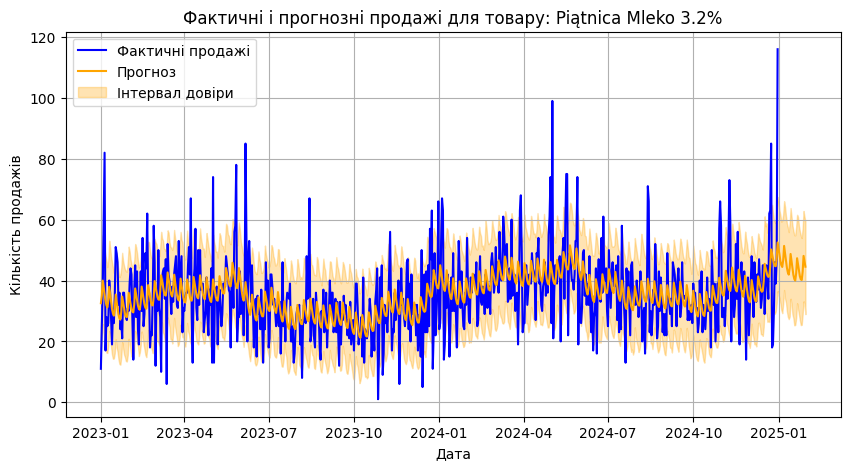

In [19]:
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd

# Припустимо, у тебе є:
# df — оригінальні дані з колонками ds, y (фактичні продажі) і item_name
# final_forecast_df — прогноз з колонками ds, yhat, yhat_lower, yhat_upper і item_name

# Вибір товару
item_selected = st.selectbox("Оберіть товар", final_forecast_df['item_name'].unique())

# Фільтруємо оригінальні дані і прогноз по вибраному товару
actual_data = df[df['item_name'] == item_selected][['ds', 'y']].copy()
forecast_data = final_forecast_df[final_forecast_df['item_name'] == item_selected][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()

# Конвертуємо дати у datetime (якщо потрібно)
actual_data['ds'] = pd.to_datetime(actual_data['ds'])
forecast_data['ds'] = pd.to_datetime(forecast_data['ds'])

# Малюємо графік
fig, ax = plt.subplots(figsize=(10, 5))

# Фактичні дані
ax.plot(actual_data['ds'], actual_data['y'], label='Фактичні продажі', color='blue')

# Прогноз (середнє значення)
ax.plot(forecast_data['ds'], forecast_data['yhat'], label='Прогноз', color='orange')

# Інтервал довіри
ax.fill_between(forecast_data['ds'], 
                forecast_data['yhat_lower'], 
                forecast_data['yhat_upper'], 
                color='orange', alpha=0.3, label='Інтервал довіри')

ax.set_title(f"Фактичні і прогнозні продажі для товару: {item_selected}")
ax.set_xlabel("Дата")
ax.set_ylabel("Кількість продажів")
ax.legend()
ax.grid(True)

st.pyplot(fig)
